# Data Visualization
Lecture by Elliot Cohen, Galvanize Boulder / Denver  
Adopted from Chris Overton, Galvanize San Francisco

## Learning Objectives
* Timeless Concepts / Modern Implimentation
* Explore vs. Explain
* Data Types
* Chart Types
* Visual Encoding
* Represention of High Dimensional Data
* Examples for Critique and Inspiration
* Rules of Thumb

![Playfair](https://upload.wikimedia.org/wikipedia/commons/d/d8/Playfair_TimeSeries.png)
William Playfair (1786), Exports and Imports of Denmark and Norway 1700-1780

![Minard](https://upload.wikimedia.org/wikipedia/commons/2/29/Minard.png)
Joseph Minard (1869), Napolean's Campaign of 1812 

## Timeless concepts
- Line & Area Graphs of Economic Data [Playfair 1786](https://en.wikipedia.org/wiki/William_Playfair#/media/File:Playfair_TimeSeries-2.png)
- Visual Storytelling [Minard 1869](https://en.wikipedia.org/wiki/Charles_Joseph_Minard#/media/File:Minard_Update.png)
- Standards for Graphic Presentation [American Statistical Association 1915](http://www.jstor.org/stable/pdf/2965153.pdf?)
- The Visual Display of Quantitative Information [Tufte 1983](http://www.sealthreinhold.com/school/tuftes-rules/rule_one.php)
- The Grammar of Graphics [Wilkinson 1999](https://www.cs.uic.edu/~wilkinson/TheGrammarOfGraphics/GOG.html)  

## Modern implimentation
- Hunter [Matplotlib](https://matplotlib.org/)
- Wickham [ggplot](http://ggplot.yhathq.com/)
- Rosling [gapminder](https://www.gapminder.org/)
- Bostock [D3](https://d3js.org/)
- Various [Folium](https://github.com/python-visualization/folium)


## Exploratory vs. Explanatory

* Exploratory:
 * Understanding data without any expected agenda or narrative.
* Explanatory:
 * Using data-viz to editorialize and communicate a narrative
 * Can be author-driven or viewer-driven.


## Types of Data
 - *Nominal* scales are simply labels. They are used for labeling categorical variables without any quantitative value. For example: eye color (blue, green, brown, hazel, etc..); country of origin (US, Canada, Mexico, etc..)  
 - *Oridnal* scales represent order or rank. For example: Rate your satisfaction on a scale of 1-5; Olympic medalists Gold, Silver, Bronze; etc...  
 - *Interval* scales are measurable and have constant difference between values (as well as being orderable). For example, temperature given in degress Celcius, or time given in seconds. The difference between 0 and 30 deg. C is the same as between 70 and 100 deg. C. 
 - *Ratio* scales have order, constant difference between values and an absolute zero. Examples include temperature in Kelvin, height and weight.  

## Types of Graphs
* Let's Take A Tour Through the [Visualization Zoo](http://homes.cs.washington.edu/%7Ejheer/files/zoo/)

## Visual Encoding
* Let's explore methods of [visual encoding](https://www.targetprocess.com/articles/visual-encoding/)

##  Color Scales
![Jet Color Gradient](http://www.met.reading.ac.uk/~ed/bloguploads/rainbow.png)
What's wrong with the color scale above?
- Creates false boundaries between colors
- Not well attunded to the human perception of colors, i.e., when people look at difference in this scale, they don't correctly perceive the differences in the encoded data.
 
Try these instead:
- [Color Theory Basics](https://cs.nyu.edu/courses/fall02/V22.0380-001/color_theory.htm)
- [Categorical Colors](https://github.com/d3/d3-scale-chromatic#api-reference)
- [ColorBrewer](http://colorbrewer2.org/#type=sequential&scheme=BuGn&n=3)
- [I want Hue](http://tools.medialab.sciences-po.fr/iwanthue/index.php)
- [ColorPicker](http://tristen.ca/hcl-picker/#/hlc/6/1/21313E/EFEE69)

## Semantically Resononant Colors
![Semantically resonant colors](https://playthink.files.wordpress.com/2008/06/stroopsample.jpg)

Try this instead:
- [Semantically-Resonant Colors](http://idl.cs.washington.edu/files/2013-SemanticColor-EuroVis.pdf)


## Respect colorblindness
A common condition that should affect your use of colors in data visualization.
 * Affects about 1/12 men and 1/200 women. ~4.5% of total population
 * Inability to distinguish red/green, or blue/green are most common.
 * Good choices are blue-yellow gradients 
 
## Accurately Recreates Data e.g. Perceptually uniform
The difference in perceived intensity of the color in the eye should match the difference in intensity of the data at all parts of the spectrum.
 * The new matplotlib color default "viridis" is chosen with this criteria in mind.
 
## Prints in black and white
e.g. perceptually uniform for lightness. Matplotlib has considered this too.


## High Dimensional Data

In [4]:
from IPython.display import HTML, Image

In [5]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
from pandas.tools.plotting import parallel_coordinates

data = pd.read_csv('data/iris.csv')
plt.figure(figsize=(12, 6))
parallel_coordinates(data, 'Name')

FileNotFoundError: File b'data/iris.csv' does not exist

## High dimensional data

* Two is easy  
* How to get more? 

We'll consider serveral approaches:
- Parallel coordinates
- PCA (preferably with *brushing-and-linking*)
- T-SNE
- TDA (toplogical data anlysis)

## A good use of PCA

* Remember that PCA seeks to maxize the variance of each component.
* Given this would you expect PCA to capture global or local structure?


NameError: name 'data' is not defined

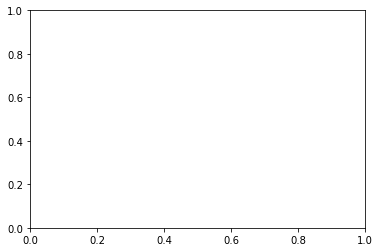

In [7]:
from sklearn.decomposition import PCA
def plot_reduced_scatter(ax, reduction):
    pca = reduction.fit_transform(data.iloc[:,0:3])
    colors = data.iloc[:,4]
    colors = colors.replace(dict(zip(colors.unique(), 
                                     ['b', 'y', 'g'])))
    ax.scatter(pca[:,0], pca[:,1], color=colors)
fig = plt.figure()
ax = fig.add_subplot(111)
plot_reduced_scatter(ax, PCA())

# T-SNE: one popular emerging algorithm

* Works best with high-d data.
* Tries to come up with low-D representation that preserves local structure observed in hi-D
* Preserves local structure, whereas PCA preserves global structure.

[In-depth video explanation](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=1&ved=0ahUKEwjV9d-Mv6_MAhVT22MKHbCYDA8QtwIIHDAA&url=https%3A%2F%2Fwww.youtube.com%2Fwatch%3Fv%3DRJVL80Gg3lA&usg=AFQjCNEDXRJcLcyT4uRh9O1JAL45-yBOUg&bvm=bv.120853415,d.cGc)

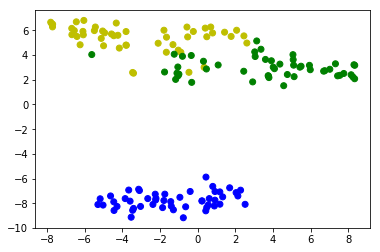

In [9]:
from sklearn.manifold import TSNE
fig = plt.figure()
ax = fig.add_subplot(111)
t_sne = TSNE(perplexity=25, learning_rate=100, n_iter=100000)
plot_reduced_scatter(ax, t_sne)

# Topological data analysis (TDA)
- Similar benefit to T-SNE, but supported by more theory
- Active development over the past decade
- Like PCA, a good tool for knowledge discovery
- Like PCA, good with brushing and linking
- One useful agorithm: 'mapper' allows a sort of map-reduce for TDA
    * Open source PyMapper implementation

### Stick around if you're willing to spend 9 minutes watching 'Power of Ten'
https://www.youtube.com/watch?v=0fKBhvDjuy0  
Excellent production values for 1970's technology & knowledge levels!

# PART II - discussion of examples

In [14]:
def show_block(src, width=900, height=800):
    block = "<iframe src='%s' width=%i height=%i></iframe>" % (src, width, height)
    return HTML(block)

(http://www.comm-dev.org/media/jw_sigpro/users/0000000951/Jan%202016%20Data%20viz/job-viz.png)
http://www.nytimes.com/interactive/2012/05/17/business/dealbook/how-the-facebook-offering-compares.html
http://visualizations.manassra.com/syria
http://sanfrancisco.crimespotting.org/#zoom=13&lon=-122.438&types=AA,Mu,Ro,SA,DP,Na,Al,Pr,Th,VT,Va,Bu,Ar&lat=37.760&hours=0-23&dtend=2014-02-28T23:59:59-07:00&dtstart=2014-02-21T23:59:59-07:00
http://mbtaviz.github.io/
http://guns.periscopic.com/
http://static5.businessinsider.com/image/4ed3b3576bb3f7c03100002a/usa-traffic-fatalities.jpg

### An ancient classic featured by a celebrated visualizer (Tufte) from the era before big data

In [15]:
show_block('https://www.edwardtufte.com/tufte/minard', height=600)

In [8]:
show_block('http://www.comm-dev.org/media/jw_sigpro/users/0000000951/Jan%202016%20Data%20viz/job-viz.png', height=400)

In [9]:
show_block("http://www.nytimes.com/interactive/2012/05/17/business/dealbook/how-the-facebook-offering-compares.html")

In [10]:
#music style timeline browser by google
show_block('http://research.google.com/bigpicture/music/#')

In [11]:
#'state of the union' presidential addresses - nlp
show_block('http://twitter.github.io/interactive/sotu2014/#p1')

In [12]:
#migration over time
show_block('http://www.nytimes.com/interactive/2014/08/13/upshot/where-people-in-each-state-were-born.html?abt=0002&abg=0')

In [13]:
show_block('http://mbtaviz.github.io/')

In [25]:
#reload to see explanation! 
show_block('http://guns.periscopic.com/', height=500)

# Spatial Data Visualization

## Chloropleth

The classic red/blue map doesn't do a good job of communicating the actual balance of support for political parties in the US.

In [19]:
show_block('https://en.wikipedia.org/wiki/Red_states_and_blue_states#/media/File:Map_of_USA_by_state_upperhouse.svg', height=600)

Showing traffic fatalities without normalizing by amount of traffic, just tells us where people drive.

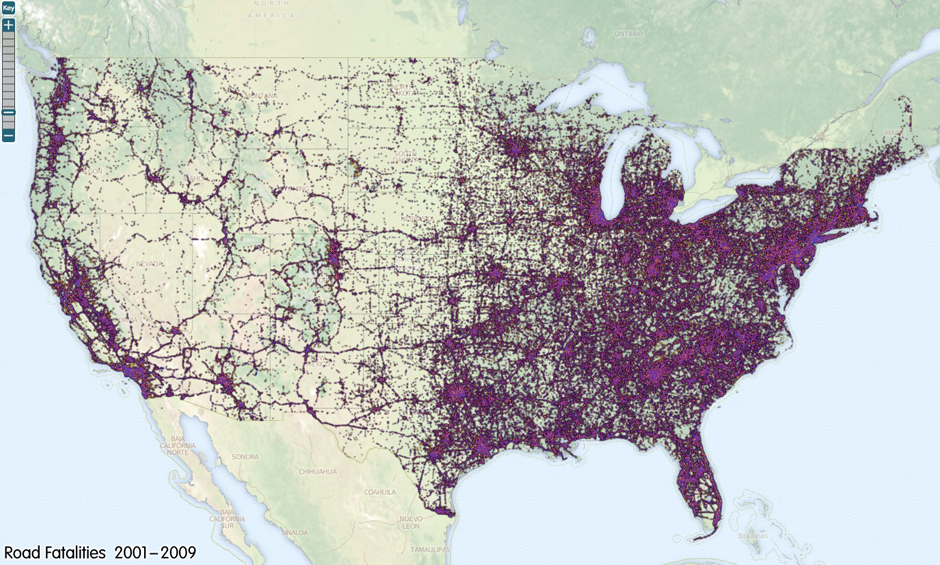

In [16]:
Image('http://static5.businessinsider.com/image/4ed3b3576bb3f7c03100002a/usa-traffic-fatalities.jpg')

Do we think that the map below is showing us an area where catholicism is more popular?

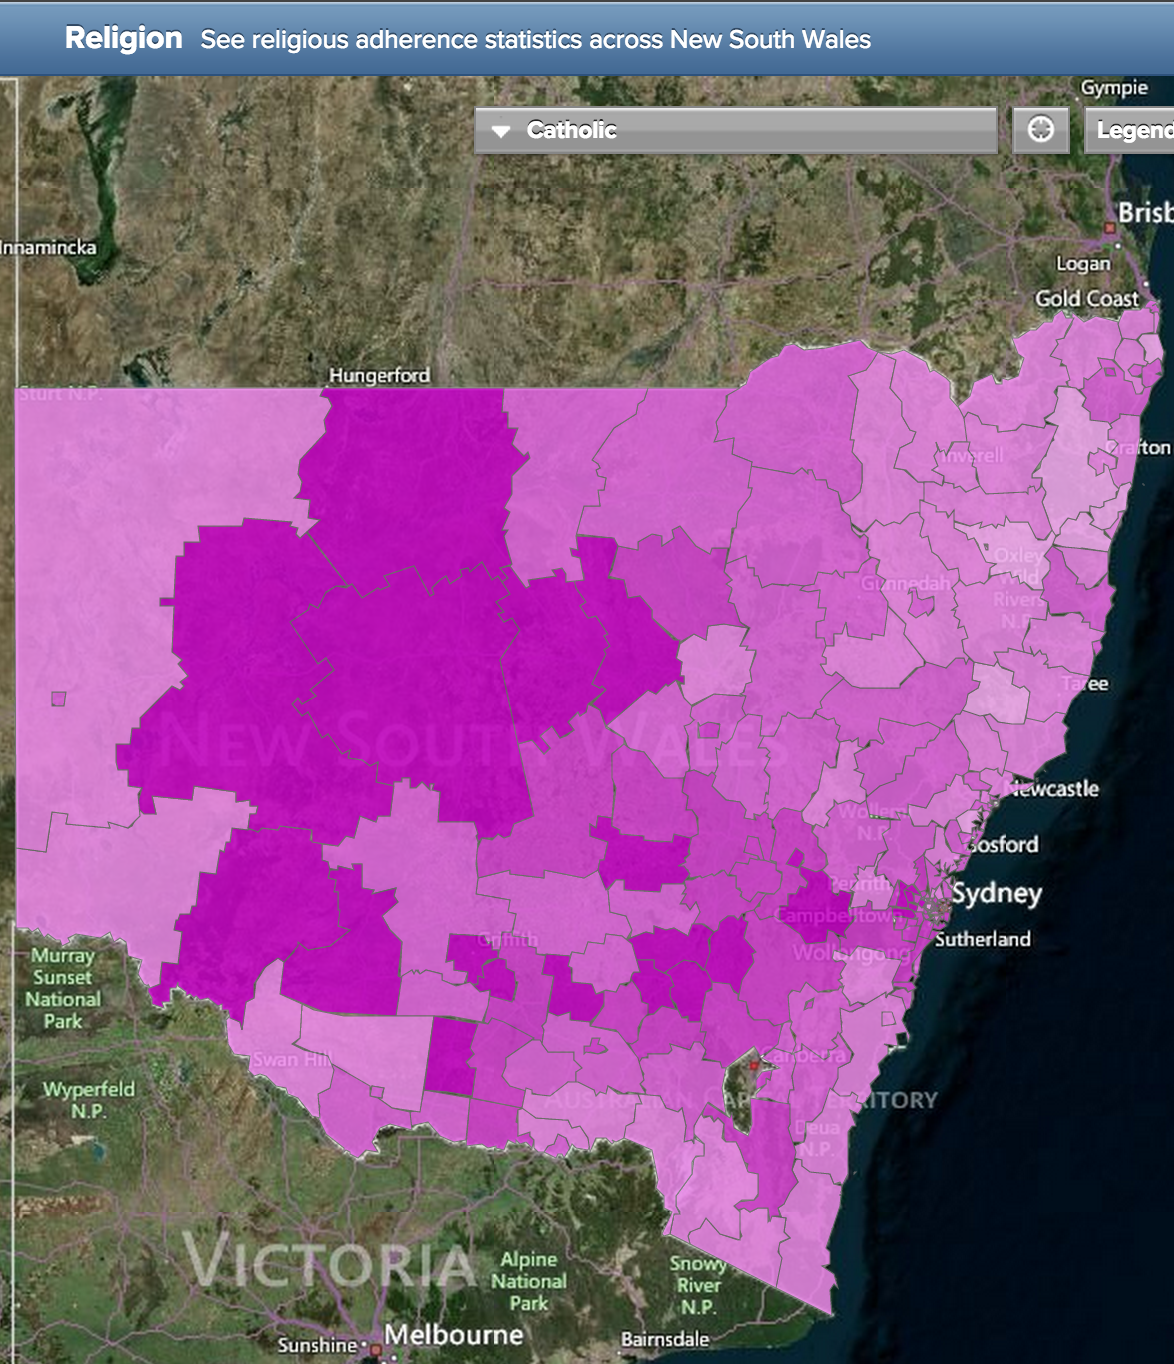

In [17]:
Image('images/chloropleth.png', width=800)

# Suggested rules of thumb: Explore
* First spread out your data (PCA, T-SNE, TDA), then examine areas of interst through cross-highlighting (brushing-and-linking)
* Try to use highly dynamic, interactive charts, rather than fixed, canned images (e.g. Tableau Software vs. fixed .png)
* Consider carefully what you may be missing: what are possible blind spots in your analysis + viz?
* Iterate frequently between subset selection and graphical representation
* Visualization is a critical part of your data science tool kit
* Implementing the relevant tech can easily suck up all your time. Budget wisely!

# Suggested rules of thumb: Explain
* Prepare material for a mixed audience, ranging from simplest points for non-data people to richer content enough to engage more sophisticated audiences
    - Make sure not to lose much of your audience: to be on the safe side, place elementary explanations early   
       -> see http://blog.udacity.com/2015/01/15-data-visualizations-will-blow-mind.html #2   
       without benefit of https://en.wikipedia.org/wiki/Simpson%27s_paradox
* Be sure to highlight a small number of simplified takeaways - a salient story makes your presentation compelling
* **Reduce clutter!** Please, please, please no ADHD overly crowded 'artwork' - this is malpractice (e.g. Bloomberg Magazine)
    - Instead, focus on main message and limit distractions
    - That doesn't mean you can't present rich struture
* Highly impressive: fine granularity within a clear theme (e.g. trajectories of individual trains and lives)
    - But careful: what seems novel today may seem tacky and outdated as technology evolves (e.g. bad Powerpoint presentations!)
* Treat your data explanation as performance art, and prepare for it with that view   
    --> see http://www.r2d3.us/visual-intro-to-machine-learning-part-1/